In [80]:
import Pkg; Pkg.activate(joinpath(@__DIR__,"..")); 
Pkg.instantiate()

using ForwardDiff
using LinearAlgebra
using Statistics
using Plots
plotlyjs()
using Printf
using Random
using DifferentialEquations

  Activating project at `c:\Users\14088\Documents\GitHub\OCRL-Walker-Project\5 Link Walker\juliaImplementation\juliaImplementation`


In [81]:
const FD = ForwardDiff;

PLOTS_DEFAULTS = Dict(:dpi => 600);

include("GeneralizedFunctionality/est_parameters.jl");
include("GeneralizedFunctionality/hybrid_system_simulation_tools.jl")
include("GeneralizedFunctionality/SKF_general.jl")
include("GeneralizedFunctionality/batch_estimation.jl")
include("GeneralizedFunctionality/generalized_saltation_calculations.jl")
# include("DynamicSystems/bouncing_ball.jl") # Defines hybrid system functions
include("DynamicSystems/biped5link.jl") # Defines hybrid system functions
include("DynamicSystems/animate_walker.jl")

plot_states (generic function with 1 method)

In [82]:
mode0 = 1
t = 3.0
dt = .01

N = 301

q1 = 200 / 180 * π
q2 = 170 / 180 * π
q3 = -20 / 180 * π
q4 = -30 / 180 * π
q5 = -5 / 180 * π
qd1 = 1.0
qd2 = 0
qd3 = 0
qd4 = 0
qd5 = 0

x0 = 1
y0 = 1
dx0 = 0
dy0 = 0

X0 = [x0, y0, q1,q2,q3,q4,q5, dx0, dy0, qd1,qd2,qd3,q4,qd5]

p = (g=9.81, 
     L_torso=0.63, L_fem=0.4, L_tib=0.4,
     M_torso=12, M_fem=6.8, M_tib=3.2,
     MY_torso=0.24, MZ_torso=0.24, 
     MZ_fem=0.11, MZ_tib=0.24, 
     XX_torso=0.63, XX_fem=1.33, XX_tib=0.2)

     
params = (m1 = 1,  m2 = 1,  m3 = 1,  m4 = 1,  m5 = 1,  m6 = 1,
		 l12 = 1, l23 = 1, l34 = 1, l45 = 1, l36 = 1, g = 9.81)

state_matrix = zeros(14, N) # should be a 14 x N matrix
state_matrix[:, 1] = deepcopy(X0)
# build a test dummy matrix
for i=2:N
    # change x,y so walker moves to the right over time
    x0, y0, q1,q2,q3,q4,q5, dx0, dy0, qd1,qd2,qd3,q4,qd5 = state_matrix[:, i-1]
    dx = 0.01
    state_matrix[:, i] .= [x0 + dx, y0, q1,q2,q3,q4,q5, dx0, dy0, qd1,qd2,qd3,q4,qd5]
end

display(size(state_matrix))
display(state_matrix)


(14, 301)

14×301 Matrix{Float64}:
  1.0         1.01        1.02       …   3.98        3.99        4.0
  1.0         1.0         1.0            1.0         1.0         1.0
  3.49066     3.49066     3.49066        3.49066     3.49066     3.49066
  2.96706     2.96706     2.96706        2.96706     2.96706     2.96706
 -0.349066   -0.349066   -0.349066      -0.349066   -0.349066   -0.349066
 -0.523599   -0.523599   -0.523599   …  -0.523599   -0.523599   -0.523599
 -0.0872665  -0.0872665  -0.0872665     -0.0872665  -0.0872665  -0.0872665
  0.0         0.0         0.0            0.0         0.0         0.0
  0.0         0.0         0.0            0.0         0.0         0.0
  1.0         1.0         1.0            1.0         1.0         1.0
  0.0         0.0         0.0        …   0.0         0.0         0.0
  0.0         0.0         0.0            0.0         0.0         0.0
 -0.523599   -0.523599   -0.523599      -0.523599   -0.523599   -0.523599
  0.0         0.0         0.0            0.0      

┌ Info: Saved animation to 
│   fn = c:\Users\14088\Documents\GitHub\OCRL-Walker-Project\5 Link Walker\juliaImplementation\juliaImplementation\src\5_link_walker.gif
└ @ Plots C:\Users\14088\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\14088\\Documents\\GitHub\\OCRL-Walker-Project\\5 Link Walker\\juliaImplementation\\juliaImplementation\\src\\5_link_walker.gif")
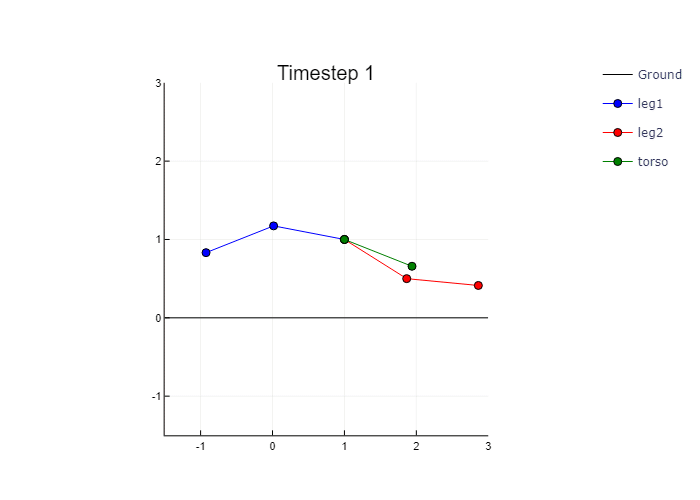

In [83]:
animate_walker(state_matrix, params)

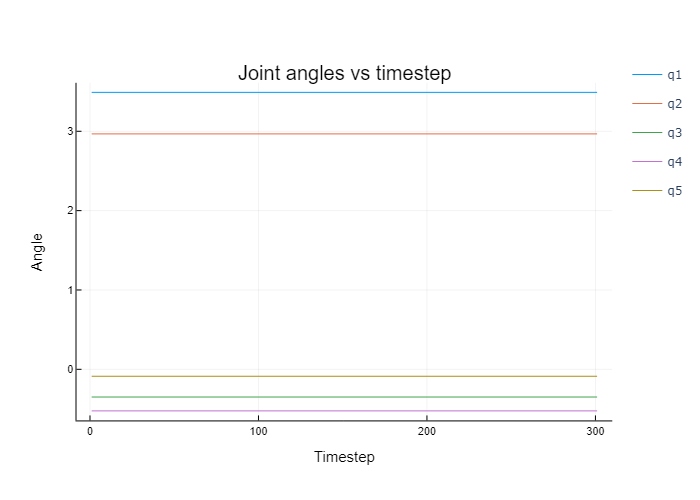

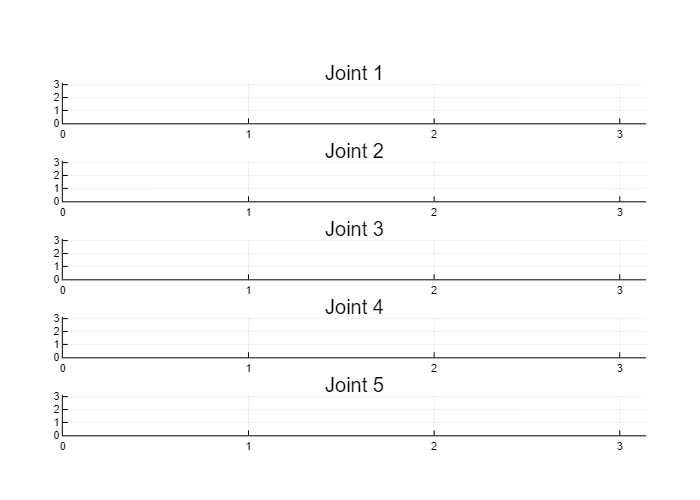

In [84]:
plot_states(state_matrix, params)